**Sentiment Analysis in Twitter using Library Tweepy And TextBlob**

This time I will make a sentiment analysis using the tweepy and TextBlob library which discusses public responses, especially Twitter application users related to "Permendikbudristek PPKS" which was initiated by the Ministry of Education, Culture, Research, and Technology.

Regulation of the Minister of Education, Culture, Research, and Technology (Permendikbudristek) Number 30 of 2021 concerning Prevention and Handling of Violence.

This new regulation will be disseminated more widely to the public as Merdeka Learning Episode Fourteen: Campus is Free from Sexual Violence.

Acting Director General of Higher Education, Research and Technology, Nizam said the main purpose of this regulation is to ensure that citizens' rights to education are maintained, through the prevention and handling of sexual violence in higher education environments.

In [1]:
#Import library
import tweepy
import csv
import pandas as pd
import re
from textblob import TextBlob
from deep_translator import GoogleTranslator
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pickle

In [2]:
#Input API from twitter
access_token = "1412618647252529156-JELI0jUP2mmKsOz3iPRa8yszgWYHIc"
access_token_secret = "H1NaJajXB2i2VVOgQdRGMLCRf0LJUldhxzoFZCQmFXGJz"
consumer_key = "aM2VPiZE2RLfV8uQRcVQ2V0O6"
consumer_key_secret = "tkbNu0EaYemxr96OGYPLXpR9hEVNQNv2QK6qu3MqleFJGCryGK"

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
consumer = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
#Input topic keywords
search_key ="Permendikbudristek PPKS"

In [4]:
#Fetch data from twitter which is then exported with csv file
csvFile = open("tweepy"+".csv","a+",newline="\n", encoding="utf-8")
csvWriter = csv.writer(csvFile)
c = []
i = []
u = []
t = []
b = []
e = []

for tweet in tweepy.Cursor(consumer.search_tweets, q=search_key, count=200, lang="id").items():
    print(tweet.created_at, tweet.id, tweet.user.name, tweet.text)
    c.append(tweet.created_at)
    i.append(tweet.id)
    u.append(tweet.user.name)
    t.append(tweet.text.encode("utf-8"))
    tweets = [tweet.created_at, tweet.id, tweet.user.name, tweet.text.encode("utf-8")]
    csvWriter.writerow(tweets)
    #Delete links and hashtags
    tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", tweet.text).split())
    #Changing tweet indonesia to english because library tweepy work in languange english
    tweet_english = GoogleTranslator(source='indonesian', target='english').translate(tweet_bersih)
    b.append(tweet_bersih)
    e.append(tweet_english)
    
#Make dictionary
dictTweets = {"waktu":c, "id":i, "username":u, "teks":t, "tweet_bersih":b, "tweet_english":e}
#Serve with dataframe
df = pd.DataFrame(dictTweets, columns=["waktu", "id", "username", "teks", "tweet_bersih", "tweet_english"])
df

2021-11-10 12:32:07+00:00 1458412150808973317 °r i n e n g g o° RT @GunRomli: Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS https://t.co/7jGSVn3fmp
2021-11-10 12:25:07+00:00 1458410391638212610 Jess...Wong Jowo RT @GunRomli: Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS https://t.co/7jGSVn3fmp
2021-11-10 12:23:25+00:00 1458409962070155269 Dodon_Ondel RT @GunRomli: Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS https://t.co/7jGSVn3fmp
2021-11-10 12:15:25+00:00 1458407946694508551 Radio Elshinta Peraturan Menteri Pendidikan, Kebudayaan, Riset &amp; Teknologi Permendikbudristek No 30 Tahun 2021 tentang Pencegahan… https://t.co/YbNtL6TC81
2021-11-10 12:06:14+00:00 1458405638405451784 peng peng RT @GunRomli: Sindir Mardani, Guntur Romli: Cuma Penjahat Kelamin yang Menolak Permendikbudristek PPKS
 https://t.co/oi4QhEfI5k
2021-11-10 12:05:06+00:00 1458405354367176713 Please c

2021-11-10 10:23:03+00:00 1458379670370406406 𝚅𝚒𝚗𝚍𝚛𝚊 𝙷𝚞𝚊𝚗𝚐 RT @GunRomli: Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS https://t.co/7jGSVn3fmp
2021-11-10 10:13:45+00:00 1458377328782835712 🇲🇨Cemonk🇲🇨 RT @Dusapanlandu: Permendikbudristek PPKS ini hadir sebagai langkah awal untuk menanggapi keresahan mahasiswa, dosen, pimpinan perguruan ti…
2021-11-10 10:08:21+00:00 1458375970839154695 Uwik KOMPAKS pun juga memberikan apresiasi penuh terhadap penerbitan pendidikan permendikbudristek terkait PPKS , sangat… https://t.co/2iy6QudEvy
2021-11-10 10:06:04+00:00 1458375395770703878 diaznann Pihak KOMPAKS juga mengapresiasi penuh penerbitan peraturan pendidikan permendikbudristek ini mengenai PPKS , ini m… https://t.co/49d0tEeu39
2021-11-10 10:04:55+00:00 1458375105197723650 ladsah RT @republikaonline: PKS menyarankan Mendikbudristek melakukan kajian mendalam sebelum menerbitkan aturan. https://t.co/auaGY56W3m
2021-11-10 10:01:41+00:00 1458374293851496453 p

2021-11-10 09:19:48+00:00 1458363751871090688 Taqasptr Pihak KOMPAKS juga mengapresiasi penuh penerbitan peraturan pendidikan permendikbudristek ini mengenai PPKS , mari… https://t.co/xWrPbIiXIu
2021-11-10 09:19:34+00:00 1458363694010683393 กٱՇٱչﻉก_չﻉก RT @GunRomli: Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS https://t.co/7jGSVn3fmp
2021-11-10 09:18:50+00:00 1458363510765748225 Mr. Wise Man RT @GunRomli: Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS https://t.co/7jGSVn3fmp
2021-11-10 09:17:13+00:00 1458363103968587777 GerBangNKRI (Gerakan Kebangsaan) RT @GunRomli: Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS https://t.co/7jGSVn3fmp
2021-11-10 09:16:22+00:00 1458362887424991236 asdewq KOMPAKS pun juga memberikan apresiasi penuh terhadap penerbitan pendidikan permendikbudristek terkait PPKS , memang… https://t.co/PdW1luRulh
2021-11-10 09:16:15+00:00 14583628603633459

2021-11-10 08:01:15+00:00 1458343987035533314 ⚜️ 𝕭𝖚𝖉𝖎𝖜𝖝𝖍 ⚜️ RT @GunRomli: Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS https://t.co/7jGSVn3fmp
2021-11-10 08:01:00+00:00 1458343922166501380 Friendy Oktian RT @WPBergerak: Permendikbudristek nomor 30 Tahun 2021 memicu pro kontra. Ada yang mendukung dan ada yang menolak peraturan menteri tentang…
2021-11-10 07:57:48+00:00 1458343118563016706 Gus Arifin RT @GunRomli: Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS https://t.co/7jGSVn3fmp
2021-11-10 07:56:36+00:00 1458342813108637697 ko_Chenk 🇮🇩 RT @GunRomli: Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS https://t.co/7jGSVn3fmp
2021-11-10 07:49:27+00:00 1458341015014686721 D @doainenaya @tubirfess Itu.. kan di tl sempet ada yg kontra sama permendikbudristek ppks tuh
2021-11-10 07:49:01+00:00 1458340908026372105 #TolakPembodohan RT @GunRomli: Kalau menurut saya sih emang cuma

2021-11-10 06:21:59+00:00 1458319002934013959 Alfakir RT @hnurwahid: Sebut Permendikbudristek Nomor 30 Tahun 2021 Tentang PPKS Bermasalah, Ketua MUI Bidang Dakwah, Cholil Nafis: Cabut! - https:…
2021-11-10 06:20:43+00:00 1458318683340611586 🐰🐣 DIDAM HOPPS ✱⁵ 🗝 💕 RT @GunRomli: Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS https://t.co/7jGSVn3fmp
2021-11-10 06:19:06+00:00 1458318278477053953 Lilian RT @GunRomli: Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS https://t.co/7jGSVn3fmp
2021-11-10 06:18:58+00:00 1458318246545805326 Mohamad Guntur Romli Kritisi Permendikbudristek PPKS? Boleh tapi kalau sampe menolak dan menuduh Permendikbudristek itu sbg legalisasi s… https://t.co/X0cR21fVoH
2021-11-10 06:18:22+00:00 1458318092811968513 Eko Prihartono/Satriya Mudha RT @GunRomli: Apalagi sampe Permendikbudristek PPKS difitnah pelegalan seks bebas, wah ini cuma koar-koar penjahat kelamin aja yg menolak p…
2021-11-10 0

2021-11-10 02:29:56+00:00 1458260608864833539 ꦤꦺꦴꦧꦶꦠ Permendikbudristek ppks 30 bagus lho padahal, kenapa gak fokus ke pencegahannya ajasih. Dari jaman ruu pks muter-mu… https://t.co/kEA9rZXTRa
2021-11-10 02:28:10+00:00 1458260161198395398 🌻 𝑀𝒾𝓀𝒽𝒶𝓎𝓁𝒶 🌻 Menurut KH Husein Muhamad Permendikbudristek PPKS ini sgt penting cegah kekeran seksual. Dengan adanya aturan ini l… https://t.co/EnAhP9GSbx
2021-11-10 02:13:03+00:00 1458256356981428224 khaleed company Dinilai Memutar Kaset Lama, Dekan Syariah UIN Jakarta Usul Ada Perbaikan Permendikbudristek PPKS… https://t.co/gRu9Em0YBR
2021-11-10 02:01:32+00:00 1458253461494001672 penempuh perjalanan RT @nu_online: Dekan Syariah dan Hukum UIN Jakarta Usul Perbaikan Permendikbudristek PPKS https://t.co/gU13g3kShN
2021-11-10 01:53:32+00:00 1458251448571949056 Aba RT @nu_online: Dekan Syariah dan Hukum UIN Jakarta Usul Perbaikan Permendikbudristek PPKS https://t.co/gU13g3kShN
2021-11-10 01:53:02+00:00 1458251320997994496 NU Online Dekan Syariah dan Huku

2021-11-09 10:27:02+00:00 1458018283479781377 Neni Sutisna RT @DPP_PPP: "Permendikbudristek ini sebaiknya dievaluasi kembali atau dicabut oleh Kementerian terkait, karena berpotensi memfasilitasi pe…
2021-11-09 10:24:48+00:00 1458017722692898817 Ivoox Indonesia Komisi X DPR Sarankan Permendikbudristek Penanganan PPKS Direvisi https://t.co/6POfu21SsC
2021-11-09 10:21:45+00:00 1458016953797279746 petiga_bros RT @DPP_PPP: "Permendikbudristek ini sebaiknya dievaluasi kembali atau dicabut oleh Kementerian terkait, karena berpotensi memfasilitasi pe…
2021-11-09 10:17:33+00:00 1458015898770370566 Konfrontasi.co Ledia Hanifah: Permendikbudristek No.30/2021 Tentang PPKS Tak Miliki Dasar Hukum https://t.co/fUarh2OkSB
2021-11-09 10:17:08+00:00 1458015795703779330 areapetiga RT @DPP_PPP: "Permendikbudristek ini sebaiknya dievaluasi kembali atau dicabut oleh Kementerian terkait, karena berpotensi memfasilitasi pe…
2021-11-09 09:52:07+00:00 1458009496714821632 Wongkito.Co K H Husein Muhammad : Perme

2021-11-09 04:44:03+00:00 1457931970323750915 Firman Nurhuda Jangan sampai persetujuan seksual dikembalikan kepada masing-masing individu. 

Hanya diera sekarang Kemendikbud ,… https://t.co/5zOLGLgmU1
2021-11-09 03:18:50+00:00 1457910526286053377 Frd RT @republikaonline: Jangan sampai persetujuan seksual dikembalikan kepada masing-masing individu. https://t.co/da4tprUssI
2021-11-09 03:00:01+00:00 1457905788563845121 Validnews Indonesia Plt Dikti Ristek Kemendikbudristek, Nizam menegaskan, tajuk di awal Permendikbudristek ini adalah pencegahan dan bu… https://t.co/gA04E6R63b
2021-11-09 02:38:16+00:00 1457900317584998401 Republika.co.id RT @republikaonline: Jangan sampai persetujuan seksual dikembalikan kepada masing-masing individu. https://t.co/da4tprUssI
2021-11-09 02:32:03+00:00 1457898750890762254 Slash_007 RT @republikaonline: Jangan sampai persetujuan seksual dikembalikan kepada masing-masing individu. https://t.co/da4tprUssI
2021-11-09 01:55:46+00:00 1457889622428569617 Republika

2021-11-08 02:20:49+00:00 1457533538694156289 Ahmad Khalif Aqil Syafiq RT @TirtoID: Seorang mahasiswi Unri yang diduga mengalami pelecehan seksual bukannya mendapat pertolongan, malah mendapat intimidasi.

KOMP…
2021-11-08 02:16:02+00:00 1457532332030586881 may RT @TirtoID: Seorang mahasiswi Unri yang diduga mengalami pelecehan seksual bukannya mendapat pertolongan, malah mendapat intimidasi.

KOMP…
2021-11-08 02:13:59+00:00 1457531817997713413 Lilian RT @TirtoID: Seorang mahasiswi Unri yang diduga mengalami pelecehan seksual bukannya mendapat pertolongan, malah mendapat intimidasi.

KOMP…
2021-11-08 02:11:59+00:00 1457531314630844419 godMei memvaksin~ RT @TirtoID: Seorang mahasiswi Unri yang diduga mengalami pelecehan seksual bukannya mendapat pertolongan, malah mendapat intimidasi.

KOMP…
2021-11-08 02:07:17+00:00 1457530129568059399 ︎ ︎ ︎m. kotaro RT @TirtoID: Seorang mahasiswi Unri yang diduga mengalami pelecehan seksual bukannya mendapat pertolongan, malah mendapat intimidasi.

KO

2021-11-05 01:26:02+00:00 1456432587463745536 Lestari Dara C U G RT @TirtoID: Nadiem Makarim mengeluarkan Permendikbudristek Nomor 30 Tahun 2021 tentang Pencegahan dan Penanganan Kekerasan Seksual (PPKS)…
2021-11-05 01:25:28+00:00 1456432443691397125 D I K A RT @TirtoID: Nadiem Makarim mengeluarkan Permendikbudristek Nomor 30 Tahun 2021 tentang Pencegahan dan Penanganan Kekerasan Seksual (PPKS)…
2021-11-05 01:24:03+00:00 1456432088962404355 Gilbrania RT @TirtoID: Nadiem Makarim mengeluarkan Permendikbudristek Nomor 30 Tahun 2021 tentang Pencegahan dan Penanganan Kekerasan Seksual (PPKS)…
2021-11-05 01:23:33+00:00 1456431960142729218 R untuk Ribet RT @TirtoID: Nadiem Makarim mengeluarkan Permendikbudristek Nomor 30 Tahun 2021 tentang Pencegahan dan Penanganan Kekerasan Seksual (PPKS)…
2021-11-05 01:23:19+00:00 1456431903658033153 apin RT @TirtoID: Nadiem Makarim mengeluarkan Permendikbudristek Nomor 30 Tahun 2021 tentang Pencegahan dan Penanganan Kekerasan Seksual (PPKS)…
2021-11-05 01:

,waktu,id,username,teks,tweet_bersih,tweet_english
0,2021-11-10 12:32:07+00:00,1458412150808973317,°r i n e n g g o°,b'RT @GunRomli: Kalau menurut saya sih emang c...,RT Kalau menurut saya sih emang cuma penjahat ...,"RT In my opinion, it's just sex criminals who ..."
1,2021-11-10 12:25:07+00:00,1458410391638212610,Jess...Wong Jowo,b'RT @GunRomli: Kalau menurut saya sih emang c...,RT Kalau menurut saya sih emang cuma penjahat ...,"RT In my opinion, it's just sex criminals who ..."
2,2021-11-10 12:23:25+00:00,1458409962070155269,Dodon_Ondel,b'RT @GunRomli: Kalau menurut saya sih emang c...,RT Kalau menurut saya sih emang cuma penjahat ...,"RT In my opinion, it's just sex criminals who ..."
3,2021-11-10 12:15:25+00:00,1458407946694508551,Radio Elshinta,"b'Peraturan Menteri Pendidikan, Kebudayaan, Ri...",Peraturan Menteri Pendidikan Kebudayaan Riset ...,"Regulation of the Minister of Education, Cultu..."
4,2021-11-10 12:06:14+00:00,1458405638405451784,peng peng,"b'RT @GunRomli: Sindir Mardani, Guntur Romli: ...",RT Sindir Mardani Guntur Romli Cuma Penjahat K...,RT Sindir Mardani Guntur Romli is just a sex c...
...,...,...,...,...,...,...
416,2021-11-03 05:50:17+00:00,1455774311130693635,BEM FIB UI,b'Universitas Indonesia sendiri merupakan perg...,Universitas Indonesia sendiri merupakan pergur...,The University of Indonesia itself is a univer...
417,2021-11-03 05:50:07+00:00,1455774269103689737,BEM FIB UI,"b'Halo, Sahabat Budaya!\n\nJanji Mendikbudrist...",Halo Sahabat Budaya Janji Mendikbudristek Nadi...,"Hello Friends of Culture, the promise of the M..."
418,2021-11-03 05:49:59+00:00,1455774235905851397,BEM FIB UI,b'[PERMENDIKBUDRISTEK PPKS: KEMENANGAN YANG HA...,PERMENDIKBUDRISTEK PPKS KEMENANGAN YANG HARUS ...,PERMENDIKBUDRISTEK PPKS WIN THAT MUST BE CONTR...
419,2021-11-02 16:24:07+00:00,1455571434990759944,Tokoh Masyarakat Goreng Adat Gegerkalong,b'RT @sentrisman: terlepas ormas islam reaksio...,RT terlepas ormas islam reaksioner ga jelas it...,"RT, apart from reactionary Islamic organizatio..."


In [5]:
df.head()

,waktu,id,username,teks,tweet_bersih,tweet_english
0,2021-11-10 12:32:07+00:00,1458412150808973317,°r i n e n g g o°,b'RT @GunRomli: Kalau menurut saya sih emang c...,RT Kalau menurut saya sih emang cuma penjahat ...,"RT In my opinion, it's just sex criminals who ..."
1,2021-11-10 12:25:07+00:00,1458410391638212610,Jess...Wong Jowo,b'RT @GunRomli: Kalau menurut saya sih emang c...,RT Kalau menurut saya sih emang cuma penjahat ...,"RT In my opinion, it's just sex criminals who ..."
2,2021-11-10 12:23:25+00:00,1458409962070155269,Dodon_Ondel,b'RT @GunRomli: Kalau menurut saya sih emang c...,RT Kalau menurut saya sih emang cuma penjahat ...,"RT In my opinion, it's just sex criminals who ..."
3,2021-11-10 12:15:25+00:00,1458407946694508551,Radio Elshinta,"b'Peraturan Menteri Pendidikan, Kebudayaan, Ri...",Peraturan Menteri Pendidikan Kebudayaan Riset ...,"Regulation of the Minister of Education, Cultu..."
4,2021-11-10 12:06:14+00:00,1458405638405451784,peng peng,"b'RT @GunRomli: Sindir Mardani, Guntur Romli: ...",RT Sindir Mardani Guntur Romli Cuma Penjahat K...,RT Sindir Mardani Guntur Romli is just a sex c...


In [6]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['tweet_english'].apply(getSubjectivity)
df['Polarity'] = df['tweet_english'].apply(getPolarity)

#Show the new dataframe with the new columns
df

,waktu,id,username,teks,tweet_bersih,tweet_english,Subjectivity,Polarity
0,2021-11-10 12:32:07+00:00,1458412150808973317,°r i n e n g g o°,b'RT @GunRomli: Kalau menurut saya sih emang c...,RT Kalau menurut saya sih emang cuma penjahat ...,"RT In my opinion, it's just sex criminals who ...",0.000000,0.00
1,2021-11-10 12:25:07+00:00,1458410391638212610,Jess...Wong Jowo,b'RT @GunRomli: Kalau menurut saya sih emang c...,RT Kalau menurut saya sih emang cuma penjahat ...,"RT In my opinion, it's just sex criminals who ...",0.000000,0.00
2,2021-11-10 12:23:25+00:00,1458409962070155269,Dodon_Ondel,b'RT @GunRomli: Kalau menurut saya sih emang c...,RT Kalau menurut saya sih emang cuma penjahat ...,"RT In my opinion, it's just sex criminals who ...",0.000000,0.00
3,2021-11-10 12:15:25+00:00,1458407946694508551,Radio Elshinta,"b'Peraturan Menteri Pendidikan, Kebudayaan, Ri...",Peraturan Menteri Pendidikan Kebudayaan Riset ...,"Regulation of the Minister of Education, Cultu...",0.000000,0.00
4,2021-11-10 12:06:14+00:00,1458405638405451784,peng peng,"b'RT @GunRomli: Sindir Mardani, Guntur Romli: ...",RT Sindir Mardani Guntur Romli Cuma Penjahat K...,RT Sindir Mardani Guntur Romli is just a sex c...,0.550000,-0.40
...,...,...,...,...,...,...,...,...
416,2021-11-03 05:50:17+00:00,1455774311130693635,BEM FIB UI,b'Universitas Indonesia sendiri merupakan perg...,Universitas Indonesia sendiri merupakan pergur...,The University of Indonesia itself is a univer...,0.500000,0.00
417,2021-11-03 05:50:07+00:00,1455774269103689737,BEM FIB UI,"b'Halo, Sahabat Budaya!\n\nJanji Mendikbudrist...",Halo Sahabat Budaya Janji Mendikbudristek Nadi...,"Hello Friends of Culture, the promise of the M...",0.833333,0.50
418,2021-11-03 05:49:59+00:00,1455774235905851397,BEM FIB UI,b'[PERMENDIKBUDRISTEK PPKS: KEMENANGAN YANG HA...,PERMENDIKBUDRISTEK PPKS KEMENANGAN YANG HARUS ...,PERMENDIKBUDRISTEK PPKS WIN THAT MUST BE CONTR...,0.400000,0.80
419,2021-11-02 16:24:07+00:00,1455571434990759944,Tokoh Masyarakat Goreng Adat Gegerkalong,b'RT @sentrisman: terlepas ormas islam reaksio...,RT terlepas ormas islam reaksioner ga jelas it...,"RT, apart from reactionary Islamic organizatio...",0.383333,-0.05


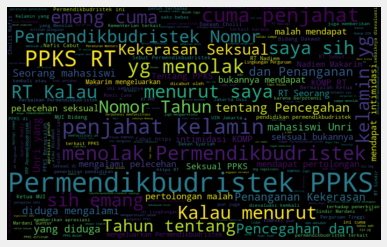

In [7]:
# Plot The World Cloud
allWords = ' '.join( [twts for twts in df['tweet_bersih']] )
wordCloud = WordCloud(width = 800, height= 500, random_state = 21, max_font_size = 200).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [8]:
#Create a function to compute the negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,waktu,id,username,teks,tweet_bersih,tweet_english,Subjectivity,Polarity,Analysis
0,2021-11-10 12:32:07+00:00,1458412150808973317,°r i n e n g g o°,b'RT @GunRomli: Kalau menurut saya sih emang c...,RT Kalau menurut saya sih emang cuma penjahat ...,"RT In my opinion, it's just sex criminals who ...",0.000000,0.00,Neutral
1,2021-11-10 12:25:07+00:00,1458410391638212610,Jess...Wong Jowo,b'RT @GunRomli: Kalau menurut saya sih emang c...,RT Kalau menurut saya sih emang cuma penjahat ...,"RT In my opinion, it's just sex criminals who ...",0.000000,0.00,Neutral
2,2021-11-10 12:23:25+00:00,1458409962070155269,Dodon_Ondel,b'RT @GunRomli: Kalau menurut saya sih emang c...,RT Kalau menurut saya sih emang cuma penjahat ...,"RT In my opinion, it's just sex criminals who ...",0.000000,0.00,Neutral
3,2021-11-10 12:15:25+00:00,1458407946694508551,Radio Elshinta,"b'Peraturan Menteri Pendidikan, Kebudayaan, Ri...",Peraturan Menteri Pendidikan Kebudayaan Riset ...,"Regulation of the Minister of Education, Cultu...",0.000000,0.00,Neutral
4,2021-11-10 12:06:14+00:00,1458405638405451784,peng peng,"b'RT @GunRomli: Sindir Mardani, Guntur Romli: ...",RT Sindir Mardani Guntur Romli Cuma Penjahat K...,RT Sindir Mardani Guntur Romli is just a sex c...,0.550000,-0.40,Negative
...,...,...,...,...,...,...,...,...,...
416,2021-11-03 05:50:17+00:00,1455774311130693635,BEM FIB UI,b'Universitas Indonesia sendiri merupakan perg...,Universitas Indonesia sendiri merupakan pergur...,The University of Indonesia itself is a univer...,0.500000,0.00,Neutral
417,2021-11-03 05:50:07+00:00,1455774269103689737,BEM FIB UI,"b'Halo, Sahabat Budaya!\n\nJanji Mendikbudrist...",Halo Sahabat Budaya Janji Mendikbudristek Nadi...,"Hello Friends of Culture, the promise of the M...",0.833333,0.50,Positive
418,2021-11-03 05:49:59+00:00,1455774235905851397,BEM FIB UI,b'[PERMENDIKBUDRISTEK PPKS: KEMENANGAN YANG HA...,PERMENDIKBUDRISTEK PPKS KEMENANGAN YANG HARUS ...,PERMENDIKBUDRISTEK PPKS WIN THAT MUST BE CONTR...,0.400000,0.80,Positive
419,2021-11-02 16:24:07+00:00,1455571434990759944,Tokoh Masyarakat Goreng Adat Gegerkalong,b'RT @sentrisman: terlepas ormas islam reaksio...,RT terlepas ormas islam reaksioner ga jelas it...,"RT, apart from reactionary Islamic organizatio...",0.383333,-0.05,Negative


In [9]:
#Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['tweet_bersih'][i])
        print()
        j = j+1

1) RT Permendikbudristek PPKS ini hadir sebagai langkah awal untuk menanggapi keresahan mahasiswa dosen pimpinan perguruan ti

2) RT CabutPermendikbudristekNo30 Judulnya Memang Bagus Tapi Coba Baca Isinya Saya apresiasi sekian banyak ormas dan tok

3) RT Permendikbudristek PPKS ini hadir sebagai langkah awal untuk menanggapi keresahan mahasiswa dosen pimpinan perguruan ti

4) KOMPAKS pun juga memberikan apresiasi penuh terhadap penerbitan pendidikan permendikbudristek terkait PPKS harus

5) RT Aliansi Kampus Aman mengajak kita tandatangani dukungan Permendikbudristek PPKS AliansiKampusA

6) Liat SW cowo kampus aswaja meduniyah yang ngeributin consent di permendikbudristek PPKS rasanya kaya mau kaget tapi

7) Aliansi Kampus Aman mengajak kita tandatangani dukungan Permendikbudristek PPKS

8) RT Permendikbudristek PPKS ini hadir sebagai langkah awal untuk menanggapi keresahan mahasiswa dosen pimpinan perguruan ti

9) KOMPAKS pun juga memberikan apresiasi penuh terhadap penerbitan pendidi

In [10]:
#Print all of the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['tweet_bersih'][i])
        print()
        j = j+1

1) RT Sindir Mardani Guntur Romli Cuma Penjahat Kelamin yang Menolak Permendikbudristek PPKS

2) RT Sindir Mardani Guntur Romli Cuma Penjahat Kelamin yang Menolak Permendikbudristek PPKS

3) RT Sindir Mardani Guntur Romli Cuma Penjahat Kelamin yang Menolak Permendikbudristek PPKS

4) RT Sindir Mardani Guntur Romli Cuma Penjahat Kelamin yang Menolak Permendikbudristek PPKS

5) RT Sindir Mardani Guntur Romli Cuma Penjahat Kelamin yang Menolak Permendikbudristek PPKS

6) RT Sindir Mardani Guntur Romli Cuma Penjahat Kelamin yang Menolak Permendikbudristek PPKS

7) RT Sindir Mardani Guntur Romli Cuma Penjahat Kelamin yang Menolak Permendikbudristek PPKS

8) RT Sindir Mardani Guntur Romli Cuma Penjahat Kelamin yang Menolak Permendikbudristek PPKS

9) RT Sindir Mardani Guntur Romli Cuma Penjahat Kelamin yang Menolak Permendikbudristek PPKS

10) RT Sindir Mardani Guntur Romli Cuma Penjahat Kelamin yang Menolak Permendikbudristek PPKS

11) RT Sindir Mardani Guntur Romli Cuma Penjahat Kelamin ya

In [11]:
#Print all of the neutral tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Neutral'):
        print(str(j) + ') '+sortedDF['tweet_bersih'][i])
        print()
        j = j+1

1) RT Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS

2) RT Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS

3) RT Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS

4) Peraturan Menteri Pendidikan Kebudayaan Riset amp Teknologi Permendikbudristek No 30 Tahun 2021 tentang Pencegahan

5) RT Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS

6) RT Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS

7) RT Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS

8) RT Kalau menurut saya sih emang cuma penjahat kelamin yg menolak Permendikbudristek PPKS

9) RT Sebut Permendikbudristek Nomor 30 Tahun 2021 Tentang PPKS Bermasalah Ketua MUI Bidang Dakwah Cholil Nafis Cabut https

10) RT PKS menyarankan Mendikbudristek melakukan kajian mendalam sebelum menerbitkan aturan

11) RT Kalau

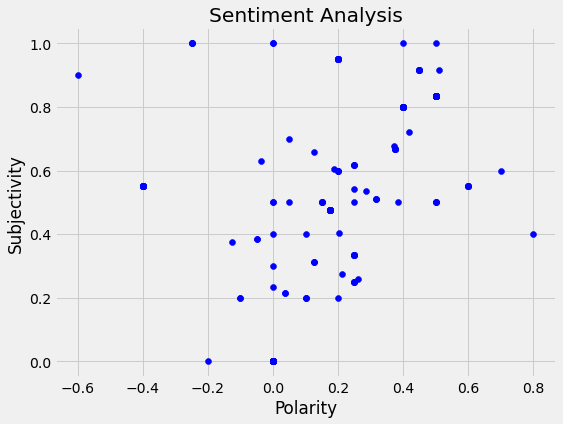

In [13]:
# Plot the polarity and subjectivty
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
    

In [14]:
#Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweet_bersih']

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

50.6

In [15]:
#Get the percentage of negative tweets
negtweets = df[df.Analysis == 'Negative']
negtweets = negtweets['tweet_bersih']

round( (negtweets.shape[0] / df.shape[0]) *100, 1)

6.4

In [16]:
#Get the percentage of negative tweets
neutweets = df[df.Analysis == 'Neutral']
neutweets = neutweets['tweet_bersih']

round( (neutweets.shape[0] / df.shape[0]) *100, 1)

43.0

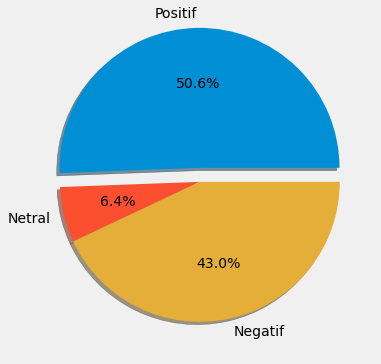

In [17]:
sentiment = ['Positif', 'Netral', 'Negatif']
count_tweet = [len(ptweets), len(negtweets), len(neutweets) ]

explode = [0 for i in sentiment] #merun nilai polutan
mx  = count_tweet.index(max(count_tweet)) #nilai max polutan
explode[mx] = 0.1


plt.figure(figsize=(8,6))

plt.pie(count_tweet, labels=sentiment, autopct='%1.1f%%', shadow=True, explode=explode)
plt.show()

In conclusion, "Permendikbudristek PPKS" received a positive response from twitter users.